In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model


In [4]:
model_df = pd.read_csv('content/model_df.csv')
model_df.isnull().sum()*100/model_df.shape[0]

Item_Fat_Content        0.0
Item_Visibility         0.0
Item_Type               0.0
Item_MRP                0.0
Outlet_Identifier       0.0
Outlet_Size             0.0
Outlet_Location_Type    0.0
Outlet_Type             0.0
Item_Outlet_Sales       0.0
dtype: float64

In [5]:
model_df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.119047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,Low Fat,0.119760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
2,Low Fat,0.103000,Fruits and Vegetables,45.5402,OUT049,Medium,Tier 1,Supermarket Type1,1516.0266
3,Regular,0.203014,Fruits and Vegetables,145.4786,OUT049,Medium,Tier 1,Supermarket Type1,1589.2646
4,Regular,0.172196,Breakfast,54.3614,OUT049,Medium,Tier 1,Supermarket Type1,718.3982


In [6]:
model_df['Item_Type'].unique()

array(['Dairy', 'Meat', 'Fruits and Vegetables', 'Breakfast',
       'Health and Hygiene', 'Snack Foods', 'Hard Drinks', 'Household',
       'Frozen Foods', 'Others', 'Baking Goods', 'Soft Drinks', 'Canned',
       'Seafood', 'Breads', 'Starchy Foods'], dtype=object)

In [7]:
df = model_df[model_df['Item_Type'] == "Dairy"]

C:\Users\anmol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


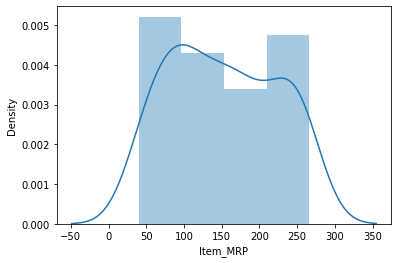

In [8]:
sns.distplot(df['Item_MRP'])
plt.show()

In [9]:
df['Item_Fat_Content'].value_counts()

Low Fat    47
Regular    27
reg         2
low fat     1
LF          1
Name: Item_Fat_Content, dtype: int64

C:\Users\anmol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


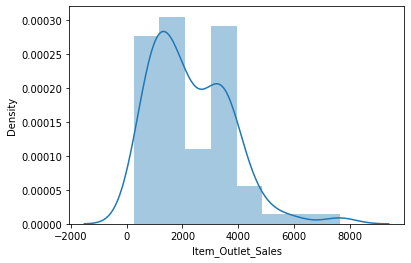

In [10]:
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

In [11]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

C:\Users\anmol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [12]:
encoder = LabelEncoder()
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

C:\Users\anmol\AppData\Local\Temp/ipykernel_28996/3770562583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
C:\Users\anmol\AppData\Local\Temp/ipykernel_28996/3770562583.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
C:\Users\anmol\AppData\Local\Temp/ipykernel_28996/3770562583.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [13]:
df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,0.119047,0,249.8092,0,0,0,0,3735.1380
11,0,0.208274,0,39.9138,0,0,0,0,690.4346
43,1,0.150565,0,213.4876,0,0,0,0,1929.4884
48,0,0.281246,0,158.1288,0,0,0,0,3299.7048
49,1,0.149058,0,43.8744,0,0,0,0,633.8416


In [14]:
reg = linear_model.LinearRegression()
reg.fit(df[['Item_Fat_Content','Item_Visibility','Item_MRP']],df.Item_Outlet_Sales)

LinearRegression()

In [15]:
reg.coef_

array([ -23.69865203, 1660.58207466,   14.32823221])

In [16]:
reg.intercept_

-133.24657045659205

In [17]:
reg.predict([[0,0.1,40]]) #predicting on random val

C:\Users\anmol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([605.94092557])